In [1]:
# import numpy as np
from sklearn.datasets import load_digits  # 加载mnist数据集
from sklearn.preprocessing import StandardScaler, MinMaxScaler # 数据预处理-标准化
from sklearn.model_selection import train_test_split  # 拆分数据集
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # 决策树分类模型, 输出决策树
from sklearn.metrics import accuracy_score  # 评估模型 准确率
from matplotlib import pyplot as plt

In [2]:
# np.set_printoptions(suppress=True) # 取消科学计数法显示

# 加载数据集

In [3]:
digits = load_digits()

In [4]:
data = digits.data
target = digits.target

In [5]:
data.shape, target.shape

((1797, 64), (1797,))

# 数据预处理--可有可无
---
使用树模型不需要归一化，因为树模型只考虑相对大小

In [6]:
# transfer = StandardScaler()
transfer = MinMaxScaler()
data = transfer.fit_transform(data)

# 拆分数据集

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=30)

In [8]:
x_train.shape, x_test.shape

((1347, 64), (450, 64))

In [9]:
y_train.shape, y_test.shape

((1347,), (450,))

# 训练模型：
---
基尼系数 最小的准则 是在 sklearn中的默认的划分依据

In [10]:
# estimator = DecisionTreeClassifier?

In [11]:
estimator = DecisionTreeClassifier(criterion='gini')  # 默认是CART

In [12]:
# estimator

In [13]:
estimator.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 预测和评估

In [14]:
y_pred = estimator.predict(x_test)

In [15]:
y_pred[:10]

array([8, 8, 6, 5, 3, 8, 3, 2, 1, 2])

In [16]:
acc = accuracy_score(y_test, y_pred)
print("预测准确率为:{:.2f}%".format(acc * 100))  # 85.11% 86%

预测准确率为:86.67%


## 预测结果混淆矩阵可视化

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0, 38,  2,  4,  1,  0,  0,  0,  5,  1],
       [ 0,  0, 45,  1,  0,  1,  0,  1,  1,  0],
       [ 0,  1,  1, 27,  0,  1,  0,  1,  2,  4],
       [ 0,  0,  0,  0, 45,  0,  1,  3,  0,  1],
       [ 0,  0,  0,  0,  2, 43,  0,  1,  0,  1],
       [ 0,  1,  0,  0,  1,  0, 51,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  2,  2,  3,  1,  0,  0,  1, 30,  1],
       [ 0,  1,  0,  3,  0,  1,  0,  0,  2, 30]])

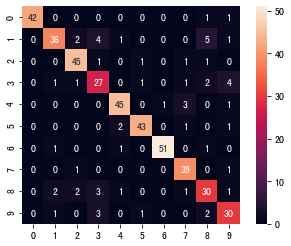

In [19]:
sns.heatmap(cm, annot=True, square=True)
plt.show()

# 输出决策树:

In [20]:
export_graphviz(decision_tree=estimator,
               out_file='./minist_CART_tree.dot')

# 熟悉决策树 
---
[参数文档](https://www.cnblogs.com/hgz-dm/p/10886368.html)

## 熟悉属性、方法

In [21]:
estimator.get_depth() #  树的深度

14

In [22]:
estimator.get_n_leaves()#  树的叶子节点数

140

In [23]:
dec_path = estimator.decision_path(x_train)

In [24]:
type(dec_path)  # csr:Compressed Sparse Row marix

scipy.sparse.csr.csr_matrix

In [25]:
# 返回树中的决策路径的稀疏矩阵 
print(dec_path)  

  (0, 0)	1
  (0, 32)	1
  (0, 94)	1
  (0, 144)	1
  (0, 145)	1
  (0, 157)	1
  (0, 158)	1
  (0, 162)	1
  (0, 163)	1
  (0, 175)	1
  (0, 177)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 12)	1
  (1, 13)	1
  (1, 15)	1
  (2, 0)	1
  (2, 32)	1
  (2, 94)	1
  (2, 144)	1
  (2, 145)	1
  (2, 157)	1
  (2, 183)	1
  (2, 187)	1
  :	:
  (1344, 144)	1
  (1344, 200)	1
  (1344, 201)	1
  (1344, 221)	1
  (1344, 222)	1
  (1344, 234)	1
  (1344, 235)	1
  (1344, 239)	1
  (1345, 0)	1
  (1345, 1)	1
  (1345, 2)	1
  (1345, 12)	1
  (1345, 13)	1
  (1345, 15)	1
  (1346, 0)	1
  (1346, 32)	1
  (1346, 94)	1
  (1346, 144)	1
  (1346, 145)	1
  (1346, 157)	1
  (1346, 158)	1
  (1346, 162)	1
  (1346, 178)	1
  (1346, 180)	1
  (1346, 181)	1


**稀疏矩阵的元组中第一个元素是数组的行索引，第二个元素应该是决策树中node的索引号，即数组的列索引**

In [26]:
dec_path.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [27]:
#  稀疏矩阵转数组
dec_path.toarray().shape  # 一共1347个样本，279个node

(1347, 279)

In [28]:
estimator.feature_importances_  # 特征的重要性（值越高，特征越重要）

array([0.        , 0.        , 0.00364539, 0.00378148, 0.01030389,
       0.0433942 , 0.00156325, 0.        , 0.00161759, 0.00648254,
       0.00671316, 0.        , 0.00661022, 0.01812968, 0.        ,
       0.        , 0.        , 0.        , 0.00744719, 0.02632989,
       0.0618885 , 0.08391247, 0.00082505, 0.        , 0.        ,
       0.00157279, 0.0768967 , 0.05243121, 0.05818903, 0.00192512,
       0.01333313, 0.        , 0.        , 0.05200804, 0.01465075,
       0.00218072, 0.07867243, 0.02986429, 0.00722912, 0.        ,
       0.        , 0.01109695, 0.08245318, 0.05538047, 0.01782731,
       0.00440327, 0.        , 0.        , 0.        , 0.        ,
       0.00801789, 0.00444092, 0.00308937, 0.01462546, 0.02594536,
       0.00162519, 0.        , 0.        , 0.01252701, 0.01010811,
       0.06065622, 0.00234505, 0.00618788, 0.00767254])

In [29]:
estimator.feature_importances_.shape  # 维度等于n_features的数组

(64,)

In [30]:
estimator.n_outputs_ # 执行拟合时的输出数量

1

## 推演决策树中一些指标计算过程：

In [31]:
import pandas as pd
import numpy as np

In [32]:
N = x_train.shape[0]

In [33]:
N # 样本数

1347

In [34]:
df = pd.DataFrame(x_train, columns=['X_%d'% i for i in range(x_train.shape[1])])

In [35]:
df

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63
0,0.0,0.0,0.8125,1.0000,1.0000,0.3125,0.0000,0.0,0.0,0.3125,...,0.3750,0.0,0.0,0.0,0.9375,1.0000,1.0000,0.6250,0.0000,0.0
1,0.0,0.0,0.1250,0.6875,0.9375,0.1250,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0,0.2500,1.0000,0.7500,0.0625,0.0000,0.0
2,0.0,0.0,0.0000,0.0625,0.4375,0.9375,0.6875,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.5625,0.3750,0.0000,0.0
3,0.0,0.0,0.1250,0.9375,0.9375,1.0000,0.6875,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0,0.2500,0.9375,0.4375,0.0000,0.0000,0.0
4,0.0,0.0,0.0000,0.0000,0.3125,0.9375,0.5000,0.0,0.0,0.0000,...,0.0625,0.0,0.0,0.0,0.0000,0.0000,0.5000,0.8750,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0.0,0.0,0.0000,0.1250,0.8750,0.3125,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0,0.0000,0.2500,1.0000,0.4375,0.0000,0.0
1343,0.0,0.0,0.5000,0.8750,1.0000,1.0000,0.1250,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0,0.7500,0.4375,0.0000,0.0000,0.0000,0.0
1344,0.0,0.0,0.1875,0.6250,0.8750,0.1875,0.0000,0.0,0.0,0.5000,...,0.7500,0.0,0.0,0.0,0.1250,0.6875,1.0000,1.0000,0.5625,0.0
1345,0.0,0.0,0.3750,0.8750,0.6875,0.0625,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0,0.3125,0.8750,0.9375,0.2500,0.0000,0.0


In [36]:
desc = df.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
X_0,1347.0,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0
X_1,1347.0,0.038512,0.113674,0.0,0.0000,0.0000,0.0000,1.0
X_2,1347.0,0.325863,0.296793,0.0,0.0625,0.2500,0.5625,1.0
X_3,1347.0,0.736405,0.269557,0.0,0.6250,0.8125,0.9375,1.0
X_4,1347.0,0.743458,0.267270,0.0,0.6250,0.8125,0.9375,1.0
...,...,...,...,...,...,...,...,...
X_59,1347.0,0.752227,0.278157,0.0,0.6250,0.8125,1.0000,1.0
X_60,1347.0,0.736359,0.310159,0.0,0.6250,0.8750,1.0000,1.0
X_61,1347.0,0.417919,0.365054,0.0,0.0000,0.3750,0.7500,1.0
X_62,1347.0,0.121334,0.248453,0.0,0.0000,0.0000,0.0625,1.0


In [37]:
desc.loc['X_36']

count    1347.000000
mean        0.640497
std         0.376634
min         0.000000
25%         0.312500
50%         0.812500
75%         1.000000
max         1.000000
Name: X_36, dtype: float64

### 根节点总基尼系数

**决策树可视化文件中根节点的内容如下：**

```
X[36] <= 0.031
gini = 0.9
samples = 1347
value = [134, 131, 128, 146, 131, 135, 127, 138, 134, 143]
```
第一行代表X的第36个特征中是否 <= 0.031；gini是总的基尼系数；samples代表总样本数；value代表每个label中的样本数。

In [38]:
sr = pd.Series(y_train)
sr.shape

(1347,)

In [39]:
# y_train中每个label的样本数量，按label排序
sr.value_counts().sort_index()

0    134
1    131
2    128
3    146
4    131
5    135
6    127
7    138
8    134
9    143
dtype: int64

In [40]:
y_value_counts = sr.value_counts().sort_index()

In [41]:
# 总基尼系数
gini = 1- sum([(n / N ) ** 2 for n in y_value_counts])

In [42]:
gini   

0.89981255604442

###  第二层节点

- 第二层左节点：gini是当特征X_36>0.031时label的基尼系数；samples代表当特征X_36>0.031时的总样本数；value代表当特征X_36>0.031时每个label中的样本数。
```
X[28] <= 0.156
gini = 0.569
samples = 218
value = [132, 0, 4, 0, 5, 20, 4, 0, 2, 51]
```
- 第二层右节点：gini是当特征X_36<=0.031时label的基尼系数；samples代表当特征X_36<=0.031时的总样本数；value代表当特征X_36<=0.031时每个label中的样本数。
```
X[21] <= 0.031
gini = 0.888
samples = 1129
value = [2, 131, 124, 146, 126, 115, 123, 138, 132, 92]
```

In [43]:
desc.loc['X_28']

count    1347.00000
mean        0.62500
std         0.38502
min         0.00000
25%         0.25000
50%         0.81250
75%         1.00000
max         1.00000
Name: X_28, dtype: float64

In [44]:
desc.loc['X_21']

count    1347.000000
mean        0.499490
std         0.385754
min         0.000000
25%         0.000000
50%         0.562500
75%         0.875000
max         1.000000
Name: X_21, dtype: float64

In [45]:
(df['X_36'] > 0.031).sum()   # f['X_36'] > 0.031 的样本数有1129个

1129

In [46]:
(df['X_36'] <= 0.031).sum()  

218

In [47]:
df['label'] = sr

In [48]:
node_2_right_value = sr[df['X_36'] > 0.031].value_counts()

In [49]:
node_2_right_value.sort_index()

0      2
1    131
2    124
3    146
4    126
5    115
6    123
7    138
8    132
9     92
dtype: int64

In [50]:
# 第二层右节点的gini系数值 0.888
1 - sum((n / node_2_right_value.sum()) **2 for n in node_2_right_value)

0.8877966423487084

In [51]:
node_2_left_value = sr[df['X_36'] <= 0.031].value_counts()
node_2_left_value.sort_index()

0    132
2      4
4      5
5     20
6      4
8      2
9     51
dtype: int64

In [52]:
# 第二层左节点的gini系数值 0.569
1 - sum((n / node_2_left_value.sum()) **2 for n in node_2_left_value)

0.5689335914485312

**可以得出：**

---
1. **根节点除第一行外，显示的都是样本总体的基尼系数、总样本数和label样本数；每个节点中第一行的特征的大小，决定了下一个节点中的gini系数、sample和value。也就是，第一行特征划分出的样本数、基尼系数、label数都在下一行的2个节点中体现。**
2. **每个结点特征<=某个值，并不是四分位数或中位数**

###  验证下其他节点的基尼系数是否大于目前的根节点
#### 假如`X[28] <= 0.156`作为根节点
---
总基尼系数仍然是0.9。分析它决定的左孩子和右孩子的基尼系数

In [53]:
df

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,label
0,0.0,0.0,0.8125,1.0000,1.0000,0.3125,0.0000,0.0,0.0,0.3125,...,0.0,0.0,0.0,0.9375,1.0000,1.0000,0.6250,0.0000,0.0,3
1,0.0,0.0,0.1250,0.6875,0.9375,0.1250,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.2500,1.0000,0.7500,0.0625,0.0000,0.0,0
2,0.0,0.0,0.0000,0.0625,0.4375,0.9375,0.6875,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0000,0.0000,0.5625,0.3750,0.0000,0.0,9
3,0.0,0.0,0.1250,0.9375,0.9375,1.0000,0.6875,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.2500,0.9375,0.4375,0.0000,0.0000,0.0,5
4,0.0,0.0,0.0000,0.0000,0.3125,0.9375,0.5000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0000,0.0000,0.5000,0.8750,0.0000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0.0,0.0,0.0000,0.1250,0.8750,0.3125,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0000,0.2500,1.0000,0.4375,0.0000,0.0,4
1343,0.0,0.0,0.5000,0.8750,1.0000,1.0000,0.1250,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.7500,0.4375,0.0000,0.0000,0.0000,0.0,7
1344,0.0,0.0,0.1875,0.6250,0.8750,0.1875,0.0000,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.1250,0.6875,1.0000,1.0000,0.5625,0.0,8
1345,0.0,0.0,0.3750,0.8750,0.6875,0.0625,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.3125,0.8750,0.9375,0.2500,0.0000,0.0,0


In [54]:
# 左节点 samples
(df['X_28'] <= 0.156).sum()

300

In [55]:
# 右节点 samples
(df['X_28'] > 0.156).sum()

1047

In [56]:
# 左节点 value
node_2_left_value = df['label'][df['X_28'] <= 0.156].value_counts()
node_2_left_value.sort_index()

0    133
1      1
2      6
3      3
4     47
5     29
6     69
7      8
8      3
9      1
Name: label, dtype: int64

In [57]:
# 左孩子的基尼系数
1 - sum((n / node_2_left_value.sum()) ** 2 for n in node_2_left_value)

0.7153333333333334

In [58]:
# 右节点 value
node_2_right_value = df['label'][df['X_28'] > 0.156].value_counts()
node_2_right_value.sort_index()

0      1
1    130
2    122
3    143
4     84
5    106
6     58
7    130
8    131
9    142
Name: label, dtype: int64

In [59]:
node_2_right_value.sum()

1047

In [60]:
# 右孩子的基尼系数
1 - sum((n / node_2_right_value.sum()) ** 2 for n in node_2_right_value)

0.8831290383494389

选择的标准：是在所有可能的特征A以及它们所有可能的切分点a中，选择基尼指数最小的特征及其对应的切分点作为最优特征与最优切分点。依最优特征与最优切分点,从现结点生成两个子结点,将训练数据集依特征分配到两个子结点中去。

---
与`X[36] <= 0.031`作为根节点相比，`X[28] <= 0.156`做根节点时，左孩子的基尼系数大于了`X[36] <= 0.031`的左孩子的基尼系数0.569。二者相比，`X[36] <= 0.031`更适合做根节点。

# 特征重要性的计算--未成功推导出
---
如果每个特征只被使用一次，那么feature_importances_应当就是这个Gini importance：    

```N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)```    

其中，N是样本的总数，N_t是当前节点的样本数目，N_t_L是结点左孩子的样本数目，N_t_R是结点右孩子的样本数目。impurity直译为不纯度（基尼指数或信息熵），这里的实现的是基尼指数。
         

In [61]:
estimator.feature_importances_

array([0.        , 0.        , 0.00364539, 0.00378148, 0.01030389,
       0.0433942 , 0.00156325, 0.        , 0.00161759, 0.00648254,
       0.00671316, 0.        , 0.00661022, 0.01812968, 0.        ,
       0.        , 0.        , 0.        , 0.00744719, 0.02632989,
       0.0618885 , 0.08391247, 0.00082505, 0.        , 0.        ,
       0.00157279, 0.0768967 , 0.05243121, 0.05818903, 0.00192512,
       0.01333313, 0.        , 0.        , 0.05200804, 0.01465075,
       0.00218072, 0.07867243, 0.02986429, 0.00722912, 0.        ,
       0.        , 0.01109695, 0.08245318, 0.05538047, 0.01782731,
       0.00440327, 0.        , 0.        , 0.        , 0.        ,
       0.00801789, 0.00444092, 0.00308937, 0.01462546, 0.02594536,
       0.00162519, 0.        , 0.        , 0.01252701, 0.01010811,
       0.06065622, 0.00234505, 0.00618788, 0.00767254])

max_depth最大深度为2时：

In [62]:
# 特征X_36的特征重要性 总样本1397 当前节点样本数1397 总基尼0.9 左孩子样本数218 左孩子基尼数0.569 右孩子1129 右孩子基尼数0.888
1397 / 1397 * (0.9 - 1129 / 1397 * 0.888 - 218 / 1397 * 0.569)

0.09356191839656411

In [63]:
218 / 1397 * (0.569 - 144 / 218 * 0.17 - 74 / 218 * 0.476)

0.04605440229062275

In [64]:
1129 / 1397 * (0.888 - 311 / 1129 * 0.744 - 798  / 1129 * 0.859)

0.061335719398711575

In [65]:
(0.09356191839656411)/ (0.09356191839656411 + 0.04605440229062275 + 0.061335719398711575)

0.4655932746767357

In [66]:
0.04605440229062275 / (0.09356191839656411 + 0.04605440229062275 + 0.061335719398711575)

0.22918106365546953

In [67]:
0.061335719398711575 / (0.09356191839656411 + 0.04605440229062275 + 0.061335719398711575)

0.3052256616677948

结果并不相同。

# 去掉前面特征重要程度0的特征重新训练
---
重新训练时，每次运行均使用默认参数

In [68]:
feature_clip = np.arange(64)
feature_clip

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [69]:
estimator.feature_importances_

array([0.        , 0.        , 0.00364539, 0.00378148, 0.01030389,
       0.0433942 , 0.00156325, 0.        , 0.00161759, 0.00648254,
       0.00671316, 0.        , 0.00661022, 0.01812968, 0.        ,
       0.        , 0.        , 0.        , 0.00744719, 0.02632989,
       0.0618885 , 0.08391247, 0.00082505, 0.        , 0.        ,
       0.00157279, 0.0768967 , 0.05243121, 0.05818903, 0.00192512,
       0.01333313, 0.        , 0.        , 0.05200804, 0.01465075,
       0.00218072, 0.07867243, 0.02986429, 0.00722912, 0.        ,
       0.        , 0.01109695, 0.08245318, 0.05538047, 0.01782731,
       0.00440327, 0.        , 0.        , 0.        , 0.        ,
       0.00801789, 0.00444092, 0.00308937, 0.01462546, 0.02594536,
       0.00162519, 0.        , 0.        , 0.01252701, 0.01010811,
       0.06065622, 0.00234505, 0.00618788, 0.00767254])

In [70]:
feature_clip = feature_clip[estimator.feature_importances_ > 0.]
feature_clip

array([ 2,  3,  4,  5,  6,  8,  9, 10, 12, 13, 18, 19, 20, 21, 22, 25, 26,
       27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 50, 51,
       52, 53, 54, 55, 58, 59, 60, 61, 62, 63])

In [71]:
x_train[:, feature_clip].shape

(1347, 44)

In [72]:
x_train_ = x_train[:, feature_clip]
y_train_ = y_train
x_test_ = x_test[:, feature_clip]
y_test_ = y_test

In [73]:
estimator2 = DecisionTreeClassifier()

In [74]:
estimator2.fit(x_train_, y_train_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
y_pred_ = estimator2.predict(x_test_)

In [76]:
accuracy_score(y_test_, y_pred_)

0.84

去掉特征前后，模型的准确率提升并不明显，且有时会降低。

原模型参数max_depth=8，其他参数均为默认值，准确率85.11%时，得到的特征重要程度；再利用该特征重要程度对特征筛选后，再用默认参数重建模型，得到的准确率为87.11%。

## 预测结果混淆矩阵可视化

In [77]:
conf_m = confusion_matrix(y_test_, y_pred_)
conf_m

array([[42,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0, 34,  3,  5,  3,  0,  0,  0,  6,  0],
       [ 0,  0, 45,  2,  0,  0,  0,  0,  2,  0],
       [ 0,  1,  0, 26,  0,  1,  0,  1,  4,  4],
       [ 2,  1,  0,  0, 42,  1,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  1, 43,  0,  2,  0,  1],
       [ 0,  1,  0,  0,  2,  0, 49,  1,  1,  0],
       [ 0,  0,  1,  0,  1,  0,  0, 38,  1,  0],
       [ 0,  3,  2,  3,  0,  1,  0,  0, 30,  1],
       [ 0,  2,  0,  4,  0,  1,  0,  0,  1, 29]])

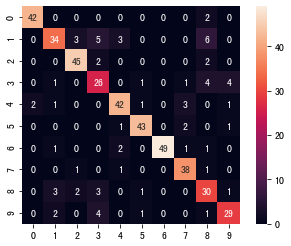

In [78]:
sns.heatmap(conf_m, annot=True, square=True)
plt.show()

# 调参前后准确率对比：
---
- all defualt 代表全部为默认值；
- all feature准确率 代表所有特征训练的准确率最佳结果；
- cliped feature准确率 代表步骤9中，去掉特征重要程度0的特征用默认参数重新训练后的准确率
- all feature准确率 与 cliped feature准确率 的为同一次运行得到的结果
- 本次调参只调整了单个参数，未同时调整

|     参数名称      | 参数值     | all feature准确率 | cliped feature准确率 |
|:-----------------:|:--------:|:-----------------:|:---------------------:|
|    all default    |          |       86.67%      |          84%          |
|     max_depth     |     8    |       85.11%      |         87.11%        |
|    max_features   |   log2   |       78.22%      |         84.89%        |
|    max_features   |   sqrt   |       84.00%      |         85.56%        |
| min_samples_split |     4    |       84.89%      |         84.67%        |
| min_samples_split |    10    |       83.78%      |         84.67%        |

- 当使用默认参数进行训练时，去掉特征重要程度0的特征再次训练，并不一定会提升准确率；
- 当调整了某个参数值时，大概率情况下，去掉特征重要程度0的特征再次训练会对准确率有1~2个百分点的提升。